<a href="https://colab.research.google.com/github/ebatty/IntroCompNeuro/blob/main/lectures/16_IntrotoNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16 - Intro to Neural Networks


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Section 1: Intro to neural networks



## Section 1.1: Neural network choices

In neuroscience, we often want to simulate a network, or population, of neurons. To do so, we build a neural network model. We use this neural network simulations to model and understand a range of neuroscience concepts, including population coding, distributed representations, excitatory-inhibitory balance, memory, decision-making, and learning.

There are a lot of different options for how we construct our neural network model. 

**Time**
We could model the network using continuous time (i.e. using different equations that evolve over time) or discrete time (have discrete time steps).

**Type of neuron**

We need to decide the neuron model we will use in our network. One big choice is between rate-based and spiking-based neurons: will we just model neural activations as continuous values (such as firing rates), or will we have spiking behavior? If we choose to have spiking-based neurons, we can choose any of our biological neuron models discussed in class: leaky integrate-and-fire neurons, Hodgkin-Huxley neurons, multi-compartment neural models, etc.

 **Type of connection**

 We need to decide how to wire up our neurons. We could have fully connected networks, where every neuron is connected to every other neuron. We could have randomly connected networks, where every neuron is connected to a random subset of the population. We could have sparsely connected networks, where each neuron is connected to only a few others. We could have connections based on spatial structure (such as neurons connecting to nearby neurons) or based on learned structure (train the neural network and learn the structure).

**Type of synapse**

How will we model the synapses between neurons in the network? We could use simple numbers to denote the weight or strength of the synapse. Alternatively, we could account for temporal effects at synapses and use a temporal kernel. We could also allow the synapses to be plastic (change over time) or static.

**Type of inputs**

We probably want some input to the network. We could have that input be constant over time, be stochastic so there is some randomness to the input, or have the input be temporally or spatially structured based on properties of the system we're modeling, among other options.

## Section 1.2: Rate-based model of neuron

One of the biggest choices (under type of neuron) is whether our neurons are rate-based or spiking-based. Spiking neural networks are more realistic, as the brain spikes, and allows us to model computations and learning based on things like spike timing and correlations. Unfortunately, these networks are very computationally expensive (in part because we need to model small enough time scales to account for spiking dynamics) and can be more difficult to analyze and train. 

Rate-based neural networks are more computationally tractable, scale well to larger networks, and are easy to analyze and train. They can capture computations and learning based on rate coding, but obviously ignore effects of exact spike timing/correlations.


We will focus on exclusively rate-based neural networks. We will ignore the temporal dynamics of how incoming pre-synaptic action potentials change the incoming current to the cell, and thus will model the synapses of just simple weights. 

<img src="https://raw.githubusercontent.com/ebatty/IntroCompNeuro/main/images/ch7fig1.png" width = "300">

Let's say we have a single output neuron getting inputs from multiple input neurons (pictured above in figure from Dayan & Abbott). We will model the firing rates of the input neurons as a vector $\bar{u}$, where the first element is the firing rate of the first input neuron, the second element is the firing rate of the second input neuron, and so on. We will use $\bar{w}$ to represent the weights from each input neuron: the first element of $\bar{w}$ is the weight from input neuron 1, the second is the weight from input neuron 2, and so on.

The total input to the output neuron is $\bar{w}\cdot\bar{u}$, the weighted sum of the input neural firing rates, where the weights are the synapse strenghs.

We can then write a differential equation for the change in the firing rate of the output neuron over time:

\begin{align}
\tau_r\frac{dv}{dt} = -v + F(\bar{w}\cdot\bar{u})
\end{align}

where $\tau_r$ is a time constant that controls how quickly the output firing rate changes in response to inputs and $F$ is some function.

**Stop and think!** Assuming the input neural firing rates are constant over time ($\bar{u}$ doesn't change based on time), what will the steady state firing rate of the output neuron be (the firing rate it converges to)? In other words, what is the fixed point of the system?

We can find the steady state firing rate by setting our differential equation equal to 0 and solving for $v$. This will give us the value of $v$ for which there will be no more change (as the derivative is equal to 0). We find that🇰

\begin{align}
v = F(\bar{w}\cdot\bar{u})
\end{align}

Let's look at an example. Let's say we have two input neurons and their firing rate does not change over time. The first input neuron fires at 5 Hz and the second at 2 Hz so 

\begin{align}
\bar{u} = \begin{bmatrix}1\\3\end{bmatrix}
\end{align}
.
Our weight matrix is 

\begin{align}\bar{w} = \begin{bmatrix}.2\\.1\end{bmatrix}\end{align}

. And our function $F$ is 

\begin{align}F(x) = \frac{1}{1+e^{-x}}\end{align}. 

And our $\tau_r$ will be 5 ms.


If we plot $\frac{dv}{dt}$ vs $v$ for this system, we get:

[Text(0, 0.5, 'dv_dt'), Text(0.5, 0, 'v')]

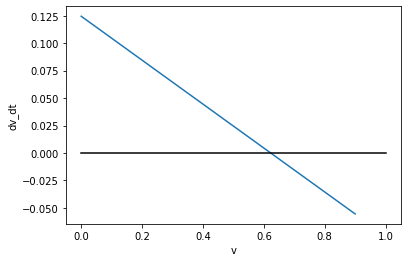

In [ ]:
# Set input and weight vectors
u = np.array([1, 3])
w = np.array([.2, .1])
tau = 5

input = np.dot(w, u)
F_input = 1 / (1 + np.exp(-input))

v = np.arange(0, 1, .1)
dv_dt = (-v + F_input)/tau

fig, ax = plt.subplots(1, 1)
ax.plot(v, dv_dt)
ax.plot([0, 1], [0, 0],'k')
ax.set(xlabel = 'v', ylabel = 'dv_dt')

**Stop and think!** What is the steady state output firing rate of our system? Is this a stable or unstable fixed point?

The derivative of v with respect to t equals 0 at around v = 0.61 (the blue line crosses the black line there). This is a stable fixed point: values of $v$ higher than 0.61 have a negative derivative so would be drawn down, back to that fixed point. Values of $v$ smaller than 0.61 have positive derivatives so would be drawn up, back to the fixed point.


Let's simulate our system using Euler's method! We will assume the output neural firing rate starts at 0.

[Text(0, 0.5, 'Output firing rate (Hz)'), Text(0.5, 0, 'Time (ms)')]

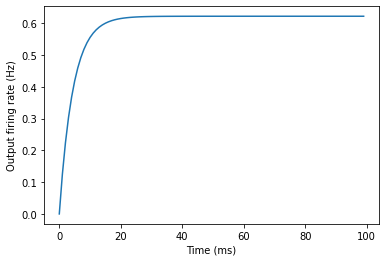

In [ ]:
# Set length of time we will simulate for (ms)
T = 100

# Set Euler step size (ms)
dt = 1

# Compute number of steps we will take
n_steps = int(T / dt)

# Set input and weight vectors
u = np.array([1, 3])
w = np.array([.2, .1])
tau = 5

# Initialize firing rate of output neuron array
v = np.zeros((n_steps,))
for step in range(n_steps - 1):

  # Compute derivative
  input = np.dot(w, u)
  F_input = 1 / (1 + np.exp(-input))
  dv_dt = (-v[step] +  F_input) / tau

  # Update v
  v[step + 1]  = v[step] + dv_dt * dt

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(0, T, dt), v)
ax.set(xlabel = 'Time (ms)', ylabel = 'Output firing rate (Hz)')

## Section 1.3: Feedforward vs recurrent networks

<img src="https://raw.githubusercontent.com/ebatty/IntroCompNeuro/main/images/ch7fig3.png" width = "500">

## Section 1.3.1: Feedforward networks

Let's extend our model from Section 1.2 to now have multiple output neurons. We can summarize their firing rates in a vector $\bar{v}$.

We now have a weight matrix instead of a weight vector, because we have multiple output neurons. The rows of $W$ are just the weight vectors for each output neuron. So the entry at row i, column j of $W$ is the weight from input neuron j to output neuron i.

 and we need to look at the evolution of the whole vector. We can write our new equation as:
\begin{align}
\tau_r\frac{d\bar{v}}{dt} = -\bar{v} + F(W\bar{u})
\end{align}

If you think through the matrix-vector multiplication, you will see this works out like our single output neuron case, we just are summarizing N different output neurons using vectors and matrices.

This model is shown in A in the figure above.

## Section 1.3.2: Recurrent neural networks

We may want to extend our model to account for interactions between the neurons in our output layer. We can introduce a new matrix $M$, which captures the synaptic weights between output neurons. Now each output neuron is driven by a weighted sum of the input neuron firing rates (the weights given by the relevant row of W) and the weighted sum of the output neuron firing rates (the weights given by the relevant row of M). Our equation becomes:

\begin{align}
\tau_r\frac{d\bar{v}}{dt} = -\bar{v} + F(W\bar{u} + M\bar{v})
\end{align}

This model is shown in B in the figure above.

# Section 2: Diving into recurrent neural networks

We have our equation for our recurrent neural network evolution, given by:


\begin{align}
\tau\frac{d\bar{v}}{dt} = -\bar{v} + F(W\bar{u} + M\bar{v})
\end{align}

where:

\begin{align}
\bar{v}&= \text{ vector of output neuron firing rates}\\
\bar{u}&= \text{ vector of input neuron firing rates}\\
W &= \text{input weight matrix from input neurons to output neurons}\\
M &= \text{recurrent weight matrix between output neurons}\\
\tau &= \text{time constant governing speed of changes in output firing rates in response to inputs}\\
F &= \text{some function}
\end{align}

We will sometimes simplify the equation to:
\begin{align}
\tau\frac{d\bar{v}}{dt} = -\bar{v} + F(\bar{h} + M\bar{v})
\end{align}

where:
\begin{align}
\bar{h}&= W\bar{u}= \text{ vector of total input from input neurons to each output neuron}\\
\end{align}

We will also often work with **linear recurrent neural networks** where $F(x) = x$:

\begin{align}
\tau\frac{d\bar{v}}{dt} = -\bar{v} + \bar{h} + M\bar{v}
\end{align}

## Section 2.1: Simulating our network

Let's simulate a linear recurrent neural network with 50 output neurons and 20 input neurons. We will assume for now the input neural firing rates are constant over time.

**Stop and think!** What size should matrix M be? Matrix W?

The matrix W should be 50 x 20, since we have 50 output neurons and 20 input neurons. The matrix M should be 50 x 50.

[Text(0, 0.5, 'Output firing rate (Hz)'), Text(0.5, 0, 'Time (ms)')]

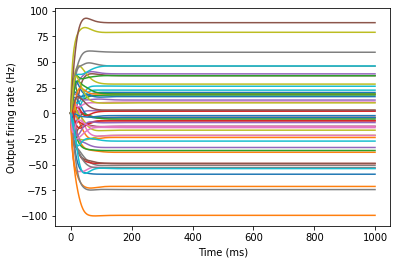

In [ ]:
# Set length of time we will simulate for (ms)
T = 1000

# Set Euler step size (ms)
dt = 1

# Compute number of steps we will take
n_steps = int(T / dt)

# Set input and weight matrices
u = np.random.randint(0, 10, size = (20,))

W = np.random.randn(50, 20)

x = np.random.randn(50, 50)
U, _, _ = np.linalg.svd(x, full_matrices=True)
M = .8* U

tau = 5

# Initialize firing rate of output neuron array
v = np.zeros((n_steps, 50))
for step in range(n_steps - 1):

  # Compute derivative 
  h = W @ u
  dv_dt = (-v[step] +  h + M @ v[step] ) / tau

  # Update v
  v[step + 1]  = v[step] + dv_dt * dt

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(0, T, dt), v)
ax.set(xlabel = 'Time (ms)', ylabel = 'Output firing rate (Hz)')

Let's look at another simulation, with a different recurrent weight matrix.

[Text(0, 0.5, 'Output firing rate (Hz)'), Text(0.5, 0, 'Time (ms)')]

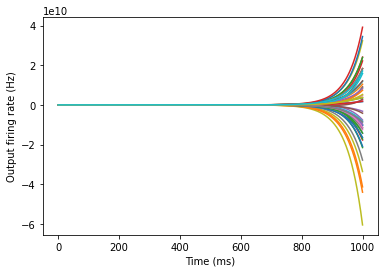

In [ ]:
x = np.random.randn(50, 50)
U, _, _ = np.linalg.svd(x, full_matrices=True)
M = 1.1 * U

tau = 5

# Initialize firing rate of output neuron array
v = np.zeros((n_steps, 50))
for step in range(n_steps - 1):

  # Compute derivative 
  h = W @ u
  dv_dt = (-v[step] +  h + M @ v[step] ) / tau

  # Update v
  v[step + 1]  = v[step] + dv_dt * dt

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(0, T, dt), v)
ax.set(xlabel = 'Time (ms)', ylabel = 'Output firing rate (Hz)')

With this weight matrix, the output firing rates explode to positive and negative infinity. We need a way to start to analyze the behavior of this system, ideally without just simulations. Luckily, we can use dynamical systems analyses techniques to start to understand and analyze our recurrent neural networks!

## Section 2.2: Eigenstuff



### Section 2.2.1: Changing to eigenbasis


We will also assume that our matrix $M$ is symmetric (the weight from neuron 1 to neuron 5 is equal to the weight from neuron 5 to neuron 1). Note this is a big assumption - we would not expect matched reciprocal connections like this in the brain. If our matrix is symmetric, it has 
This means that matrix $M$ has $N$ orthogonal eigenvectors, $\bar{e}_1, \bar{e}_2, ..., \bar{e}_N$, with distinct eigenvalues, $\lambda_1, \lambda_2, ..., \lambda_N$. Remember that the definition of an eigenvector of a matrix is that it is a vector that when multiplied by the matrix transforms to a scalar multiple of itself:

$$M\bar{e}_i = \lambda_i\bar{e}_i $$

Because the eigenvectors are orthogonal, the dot product of different eigenvectors is 0:
$\bar{e}_j\cdot\bar{e}_i = 0$ if j does not equal i. We will assume we have normalized the eigenvectors so that $\bar{e}_j\cdot\bar{e}_j = 1$

We can analyze our linear recurrent system nicely using the eigenvalues and eigenvectors of matrix $M$. Because we have N orthogonal eigenvectors, these form a basis for N dimensional space. This means that we can change bases to this eigenbasis. Instead of writing the coordinates of a point with respect to the standard basis (the x/y/z axes), we can write the point with respect to the eigenvectors. Review vector bases and changes of bases if confused: https://ebatty.github.io/IntroCompNeuro/lectures/MathReview.html.

We can write any N-dimensional vector in terms of the coordinates with respect to the eigenvectors, including the firing rate vector:

$$\bar{v}(t) = \sum_{i=1}^N c_i(t)\bar{e}_i$$

So we are writing the vector of firing rates as a linear combination of the eigenvectors of M with some scalar weightings $c_i$.

### Section 2.2.2: Looking at evolution of eigenvector coordinates over time

Instead of looking at the evolution of our output firing rates over time, we can now look at the evolution of evolution of our $c_i$'s over time. At a given time, we can reconstruct the output firing rate vector with our equation:

$$\bar{v}(t) = \sum_{i=1}^N c_i(t)\bar{e}_i$$

We can derive a differential equation for each $c_j$ and find that:


\begin{align}
\tau \frac{d{c_i(t)}}{dt} &= - c_i(t)(1 - \lambda_i) + \bar{h}  \cdot \bar{e}_i
\end{align}

**Derivation of above equation**: 
You do not need to understand this derivation - it is here if you wish to.

Let's substitute this formula for $v(t)$ into our equation for our network:
\begin{align}
\tau \frac{d{v}}{dt} &= -\bar{v} + \bar{h} + M\bar{v}\\
\tau \frac{d{\sum_{i=1}^N c_i(t)\bar{e}_i}}{dt} &= -\sum_{i=1}^N c_i(t)\bar{e}_i + \bar{h} + M\sum_{i=1}^N c_i(t)\bar{e}_i
\end{align}
We can change where the sum occurs in the left-hand side of the equation (because the derivative of summed entries is the sum of their derivatives):
$$\frac{d{\sum_{i=1}^N c_i(t)\bar{e}_i}}{dt} = \sum_{i=1}^N [\frac{d{c_i(t)}}{dt}\bar{e}_i]$$
and rearrange the right-hand side:
\begin{align}
\tau \sum_{i=1}^N [\frac{d{c_i(t)}}{dt}\bar{e}_i] &= -\sum_{i=1}^N c_i(t) [(\bar{e}_i - M\bar{e}_i)] + \bar{h}\\
&= -\sum_{i=1}^N [c_i(t)(\bar{e}_i - \lambda_i\bar{e}_i)] + \bar{h}
\end{align}
In the last step, we used the fact that $\bar{e}$s are eigenvectors.
We can now get rid of the sum by taking the dot product of both sides with $\bar{e}_j$. Let's take the left-hand side first
\begin{align}
\tau \sum_{i=1}^N [\frac{d{c_i(t)}}{dt}\bar{e}_i] \cdot \bar{e_j}
&= \tau \sum_{i=1}^N [\frac{d{c_i(t)}}{dt}\bar{e}_i\cdot\bar{e_j}]\\
&= \tau \frac{d{c_j(t)}}{dt}
\end{align}
For the last step, remember that the eigenvectors are orthogonal and unit vectors so that the dot product of different eigenvectors is 0 and the dot product of the eigenvector with itself is 1. So the only entry of the sum that won't be zero is when j is equal to i.

Now let's look at the right-hand side:
\begin{align}
(-\sum_{i=1}^N [c_i(t)(\bar{e}_i - \lambda_i\bar{e}_i)] + \bar{h})\cdot\bar{e}_j &= \sum_{i=1}^N [c_i(t)(\bar{e}_i - \lambda_i\bar{e}_i) \cdot \bar{e}_j] + \bar{h}  \cdot \bar{e}_j\\
&= -\sum_{i=1}^N [c_i(t)(\bar{e}_i\cdot \bar{e}_j - \lambda_i\bar{e}_i \cdot \bar{e}_j)] + \bar{h}  \cdot \bar{e}_j\\
&= - c_j(t)(1 - \lambda_j) + \bar{h}  \cdot \bar{e}_j\\
\end{align}
Now let's put them back together to get our differential equations for the $c_i$'s:
\begin{align}
\tau \frac{d{c_j(t)}}{dt} &= - c_j(t)(1 - \lambda_j) + \bar{h}  \cdot \bar{e}_j
\end{align}


**Simulation**

Let's look at a simple simulation to prove to ourselves that we can look at the evolution of the coordinate values, $c_i$'s over time and reconstruct the firing rate. We will assume we have two input neurons and two output neurons. In the first cell below, we simulate our network as we have been doing using euler's method for $\frac{dv}{dt}$.

[Text(0, 0.5, 'Output firing rate (Hz)'), Text(0.5, 0, 'Time (ms)')]

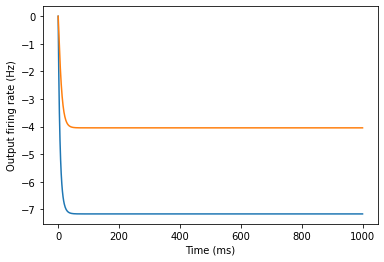

In [ ]:
# Set length of time we will simulate for (ms)
T = 1000

# Set Euler step size (ms)
dt = 1

# Compute number of steps we will take
n_steps = int(T / dt)

# Set input and weight matrices
u = np.array([2, 4])
W = np.random.randn(2, 2)

M = np.array([[.1, .2], [.2, .3]])

tau = 5

# Initialize firing rate of output neuron array
v = np.zeros((n_steps, 2))
for step in range(n_steps - 1):

  # Compute derivative 
  h = W @ u
  dv_dt = (-v[step] +  h + M @ v[step] ) / tau

  # Update v
  v[step + 1]  = v[step] + dv_dt * dt

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(0, T, dt), v)
ax.set(xlabel = 'Time (ms)', ylabel = 'Output firing rate (Hz)')

Now, we will take an alternate approach and approximate the evolution of $c_1$ and $c_2$ according to our equations, then reconstruct the firing rates. The initial values of the output firing rates are 0, so $c_1$ and $c_2$ are initially 0.

[Text(0, 0.5, 'Output firing rate (Hz)'), Text(0.5, 0, 'Time (ms)')]

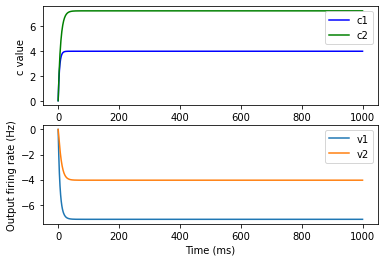

In [ ]:
# Find eigvals, eigvecs of M
eigvals, eigvecs = np.linalg.eig(M)

# Initialize cs
c1 = np.zeros((n_steps,))
c2 = np.zeros((n_steps,))
for step in range(n_steps - 1):

  # Compute derivative 
  h = W @ u
  dc1_dt = (-c1[step]*(1-eigvals[0]) +  np.dot(h, eigvecs[:, 0]) ) / tau
  dc2_dt = (-c2[step]*(1-eigvals[1]) +  np.dot(h, eigvecs[:, 1]) ) / tau

  # Update c
  c1[step + 1]  = c1[step] + dc1_dt * dt
  c2[step + 1]  = c2[step] + dc2_dt * dt

# Compute v
v = np.zeros((n_steps, 2))
for step in range(n_steps ):
  v[step] = c1[step]*eigvecs[:, 0] + c2[step]*eigvecs[:, 1]

fig, axes = plt.subplots(2, 1)
axes[0].plot(np.arange(0, T, dt), c1, 'b', label = 'c1')
axes[0].plot(np.arange(0, T, dt), c2, 'g', label = 'c2')
axes[0].legend()

axes[1].plot(np.arange(0, T, dt), v)
axes[1].legend(['v1', 'v2'])

axes[0].set(xlabel = 'Time (ms)', ylabel = 'c value')
axes[1].set(xlabel = 'Time (ms)', ylabel = 'Output firing rate (Hz)')

You can see that we find the exact same output firing rates over time using this method.

### Section 2.2.3: Analyzing analytical solutions of c's

**If any of the eigenvalues of matrix M are over 1, the output firing rates will blow up to positive or negative infinity - the network will explode. If all of the eigenvalues are under 1, the output firing rates will converge to some steady state values.**

Let's prove this.

If the input neuron firing rates are constant, so $\bar{h} = W\bar{u}$ is constant over time, we can find an analytical solution for the evolution of firing rate vector coordinates with respect to the eigenvectors, $c_i$'s.

We will not cover the derivation of this analytical solution as it involve tough integrals, but will just give you the equation:

\begin{align}
c_i(t) = \frac{\bar{h}\cdot\bar{e_i}}{1-\lambda_i}(1-exp(-\frac{t(1-\lambda_i)}{\tau})) + c_i(0)exp(-\frac{t(1-\lambda_i)}{\tau})
\end{align}


If $\lambda_1$ is 0.8, what will happen to $c_1$ over time?

\begin{align}
exp(-\frac{t(1-\lambda_i)}{\tau}) &= exp(-\frac{t(.2)}{\tau})
\end{align}

If we plot this, we see it goes to 0 at large values of t.

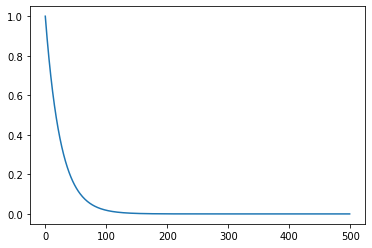

In [ ]:
t_vec = np.arange(0, 500)
plt.plot(t_vec, np.exp(-.2*t_vec/tau))

So at large values of t, this term will equal 0 and we will get:

\begin{align}
c_1(t) &= \frac{\bar{h}\cdot\bar{e_1}}{1-\lambda_1}(1-exp(-\frac{t(1-\lambda_1)}{\tau})) + c_1(0)exp(-\frac{t(1-\lambda_1)}{\tau})\\
&= \frac{\bar{h}\cdot\bar{e_1}}{1-\lambda_1}(1-0) + c_1(0)*0)\\
&=\frac{\bar{h}\cdot\bar{e_1}}{1-\lambda_1}\\
\end{align}

The value of c will decay to a fixed point $\frac{\bar{h}\cdot\bar{e_1}}{1-\lambda_1}$


If $\lambda_1$ is 1.2, what will happen to $c_1$ over time?


\begin{align}
exp(-\frac{t(1-\lambda_i)}{\tau}) &= exp(-\frac{t(-.2)}{\tau})
\end{align}

If we plot this, we see it goes to infinity at large values of t.

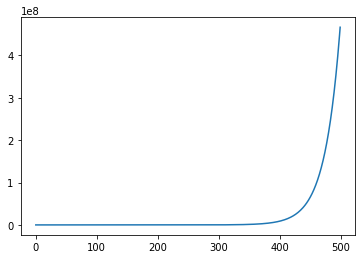

In [ ]:
t_vec = np.arange(0, 500)
plt.plot(t_vec, np.exp(.2*t_vec/tau))

So $c_1$ will blow up to positive or negative infinity. If one of the c's blows up, $\bar{v}(t)$ will too.

**If any of the eigenvalues of matrix M are over 1, the output firing rates will blow up to positive or negative infinity - the network will explode. If all of the eigenvalues are under 1, the output firing rates will converge to some steady state values.**

**Stop and think!** What is the formula for the steady state value of $\bar{v}$ using the eigenbasis? Assume the input neuron firing rates do not change over time and all eigenvalues are under 1.



\begin{align}
\bar{v}(t) &= \sum_{i=1}^N c_i(t)\bar{e}_i\\
\tau \frac{d{c_i(t)}}{dt} &= - c_i(t)(1 - \lambda_i) + \bar{h}  \cdot \bar{e}_i
\end{align}

We can find the steady state value of $\bar{v}$ by finding the values of $c_i$'s when their derivatives are equal to 0.

\begin{align}
\tau \frac{d{c_j(t)}}{dt} &= - c_j(t)(1 - \lambda_j) + \bar{h}  \cdot \bar{e}_j = 0\\
c_j(t) = \frac{\bar{h}\cdot\bar{e}_j}{1-\lambda_j}
\end{align}

We can then subsitute into our equation for $\bar{v}$:

\begin{align}
\bar{v}_{SS} &= \sum_{i=1}^N c_i(t)\bar{e}_i\\
&= \sum_{i=1}^N \frac{\bar{h}\cdot\bar{e}_i}{1-\lambda_i}\bar{e}_i
\end{align}


### Section 2.2.4: Connection to general understanding of first order differential equations

Let's rearrange slightly our equation for our linear recurrent neural network:

\begin{align}
\tau\frac{d\bar{v}}{dt} &= -\bar{v} + \bar{h} + M\bar{v}\\
\frac{d\bar{v}}{dt} &= \frac{(M - 1)\bar{v} + \bar{h}}{\tau}\\
\end{align}

Let's say we have no input so $\bar{h} = \bar{0}$

\begin{align}
\frac{d\bar{v}}{dt} &= \frac{(M - 1)}{\tau}\bar{v}\\
\end{align}

This resembles our simple first order system of differential equations from section 2.4.1 here: https://ebatty.github.io/IntroCompNeuro/lectures/MathReview.html.

In particular, 

\begin{align}
\frac{d\bar{v}}{dt} = A\bar{v}
\end{align}

where 
\begin{align}
A = \frac{(M-1)}{\tau}
\end{align}

The eigenvalues of A are the same as the eigenvalues of M but minus 1. So what we have found syncs with our gif:


In [ ]:
#@markdown Execute this cell to view dynamical systems gif

from IPython.display import Image

Image(url = 'https://github.com/ebatty/MathToolsforNeuroscience/blob/master/dynsysdemo.gif?raw=True', width=700)

Eigenvalues of M over 1 are equivalent to eigenvalues of A over 0 and so lead to our system blowing up. All eigenvalues of M under 1 are equivalent to eigenvalues of A under 0 and so lead to our system converging on a fixed point (in the case of zero input, the origin).